# Bootstrap

Bootstrap samplingによるバイアス低減方法

## Parametric bootstrap resampling (PBE)



最尤推定量を$\theta_{ML}$とする。これを使ったサンプル$z \sim \mathcal{N}(\theta_{ML}, \Sigma(\theta_{ML}))$を抽出することを$k$回繰り返し、各データセットで別の最尤推定量$\theta^{(i)}$を取得すると、$\theta_{ML}$のバイアス$b$は次のように推定することができる。

$$
b = \frac{1}{k} \sum^k_{i=1} (\theta_{ML} - \theta^{(i)})
$$

これによってバイアスを補正した推定量$\theta_{PBE}$は

$$
\begin{align}
\theta_{PBE}
&= \theta_{ML} - b\\
&= 2 \theta_{ML} - \frac{1}{k} \sum^k_{i=1} \theta^{(i)}
\end{align}
$$

と得ることができる。

:::{warning} $\mathcal{N}(\theta_{ML}, \Sigma(\theta_{ML}))$は推測で書いている

この記述を参考にした[Meshcheryakov et al. (2021)](https://arxiv.org/pdf/2106.01140.pdf)の第7節では

$$
\mathcal{N}(0, \Sigma(\theta))
$$

と書かれていた。ただ、推定量の分布（標本分布）を考えるときに$\mathcal{N}(E[\theta], SD(\theta))$ではなく平均を0とおくのは違和感が強い。$\theta$を0と見間違えたのでは？と思っている

原典？として引用されることが多い [Efron (1982)](https://www.amazon.co.jp/dp/0898711797) は絶版ではないものの高くて入手性が悪いので原典にあたれていない
:::

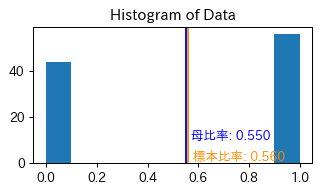

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

np.random.seed(0)

p_true = 0.55
n = 100
x = np.random.binomial(n=1, p=p_true, size=n)
p_ml = x.mean()

fig, ax = plt.subplots(dpi=90, figsize=[4, 2])
ax.hist(x)
ax.set(title="Histogram of Data")
ax.axvline(p_true, color="blue")
ax.text(p_true + 0.02, 10, f"母比率: {p_true:.3f}", color="blue")
ax.axvline(p_ml, color="darkorange")
ax.text(p_ml + 0.02, 1, f"標本比率: {p_ml:.3f}", color="darkorange")
fig.show()

In [86]:
# 標準誤差の推定
std = np.sqrt(p_ml * (1 - p_ml))
se = std / np.sqrt(n)
print(f"std error: {se:.3f}")

std error: 0.050


In [94]:
# N(0, SE)とする場合
np.random.seed(0)

k = 100
p_boots = []
for _ in range(k):
    z = np.random.normal(loc=0, scale=se, size=n)
    p_ml_z = z.mean()
    p_boots.append(p_ml_z)

p_boots = np.array(p_boots)
b_hat = (p_ml - p_boots).mean()
print(f"バイアスの推定値 b_hat = {b_hat:.3f}")

p_pbe = p_ml - b_hat
print(f"PBE推定値 p_pbe = {p_pbe:.3f}")

バイアスの推定値 b_hat = 0.561
PBE推定値 p_pbe = -0.001


In [95]:
# N(θ, SE)とする場合
np.random.seed(0)

k = 100
p_boots = []
for _ in range(k):
    z = np.random.normal(loc=p_ml, scale=se, size=n)
    p_ml_z = z.mean()
    p_boots.append(p_ml_z)

p_boots = np.array(p_boots)
b_hat = (p_ml - p_boots).mean()
print(f"バイアスの推定値 b_hat = {b_hat:.3f}")

p_pbe = p_ml - b_hat
print(f"PBE推定値 p_pbe = {p_pbe:.3f}")

バイアスの推定値 b_hat = 0.001
PBE推定値 p_pbe = 0.559


## 参考

- [Meshcheryakov, G., Igolkina, A. A., & Samsonova, M. G. (2021). semopy 2: A structural equation modeling package with random effects in python. arXiv preprint arXiv:2106.01140.](https://arxiv.org/pdf/2106.01140.pdf)の第7節
- [15.3 - Bootstrapping | STAT 555](https://online.stat.psu.edu/stat555/node/119/)